In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import (
    StructType, StructField, StringType, IntegerType, LongType, FloatType, DoubleType,
    BooleanType, DateType, TimestampType, BinaryType, ArrayType, MapType, DecimalType
)
import datetime
import decimal

# Criar uma sessão Spark
spark = SparkSession.builder.appName("ExemploTipagens").getOrCreate()

# Definir o esquema com todas as tipagens possíveis
schema = StructType([
    StructField("Nome", StringType(), True),
    StructField("Salario", FloatType(), True),
    StructField("Idade", IntegerType(), True),
    StructField("Profissao", StringType(), True),
    StructField("Ativo", BooleanType(), True),
    StructField("Data_Contratacao", DateType(), True),
    StructField("Ultima_Atualizacao", TimestampType(), True),
    StructField("Identificador", LongType(), True),
    StructField("Notas", DoubleType(), True),
    StructField("Foto", BinaryType(), True),
    StructField("Habilidades", ArrayType(StringType()), True),
    StructField("Atributos", MapType(StringType(), StringType()), True),
    StructField("Endereco", StructType([
        StructField("Rua", StringType(), True),
        StructField("Cidade", StringType(), True),
        StructField("CEP", StringType(), True)
    ]), True),
    StructField("Salario_Decimal", DecimalType(10, 2), True)
])

# Dados fictícios
data = [    
    (
        'Alice', 50000.0, 25, 'Engenheiro', True, datetime.date(2020, 1, 15), datetime.datetime(2023, 10, 1, 12, 0, 0), 123456789012345,
        4.5, bytearray(b'\x00\x01'), ['Python', 'Spark'], {'Chave1': 'Valor1', 'Chave2': 'Valor2'},
        {'Rua': 'Rua A', 'Cidade': 'Cidade X', 'CEP': '12345-678'}, decimal.Decimal('50000.00')
    ),
    (
        'Samuel', 10.25, 30, 'Engenheiro de Dados', False, datetime.date(2019, 3, 22), datetime.datetime(2023, 10, 1, 12, 0, 0), 123456789012346,
        3.8, bytearray(b'\x00\x02'), ['Java', 'PySpark', 'Ritmo Ragatanga', 'Hadoop'], {'Chave1': 'Valor3', 'Chave2': 'Valor4'},
        {'Rua': 'Rua B', 'Cidade': 'Cidade Y', 'CEP': '23456-789'}, decimal.Decimal('10.25')
    ),
    (
        'Marta', 12500.0, 40, 'Cientista de Dados', True, datetime.date(2018, 5, 5), datetime.datetime(2023, 10, 1, 12, 0, 0), 123456789012347,
        4.0, bytearray(b'\x00\x03'), ['R', 'Python'], {'Chave1': 'Valor5', 'Chave2': 'Valor6'},
        {'Rua': 'Rua C', 'Cidade': 'Cidade Z', 'CEP': '34567-890'}, decimal.Decimal('12500.00')
    ),
    (
        'Paula', 7500.0, 35, 'Desenvolvedora', False, datetime.date(2017, 7, 10), datetime.datetime(2023, 10, 1, 12, 0, 0), 123456789012348,
        4.2, bytearray(b'\x00\x04'), ['Java', 'Python'], {'Chave1': 'Valor7', 'Chave2': 'Valor8'},
        {'Rua': 'Rua D', 'Cidade': 'Cidade W', 'CEP': '45678-901'}, decimal.Decimal('7500.00')
    ),
    (
        'Carlos', 15000.0, 45, 'Engenheiro de Software', True, datetime.date(2016, 9, 30), datetime.datetime(2023, 10, 1, 12, 0, 0), 123456789012349,
        4.9, bytearray(b'\x00\x05'), ['Java', 'Scala'], {'Chave1': 'Valor9', 'Chave2': 'Valor10'},
        {'Rua': 'Rua E', 'Cidade': 'Cidade V', 'CEP': '56789-012'}, decimal.Decimal('15000.00')
    ),
    (
        'Laura', 10000.0, 50, 'Analista de Dados', False, datetime.date(2015, 12, 20), datetime.datetime(2023, 10, 1, 12, 0, 0), 123456789012350,
        4.7, bytearray(b'\x00\x06'), ['Python', 'SQL'], {'Chave1': 'Valor11', 'Chave2': 'Valor12'},
        {'Rua': 'Rua F', 'Cidade': 'Cidade U', 'CEP': '67890-123'}, decimal.Decimal('10000.00')
    ),
    (
        'Mariana', 7500.0, 55, 'Desenvolvedora', True, datetime.date(2014, 2, 15), datetime.datetime(2023, 10, 1, 12, 0, 0), 123456789012351,
        4.3, bytearray(b'\x00\x07'), ['Java', 'Scala'], {'Chave1': 'Valor13', 'Chave2': 'Valor14'},
        {'Rua': 'Rua G', 'Cidade': 'Cidade T', 'CEP': '78901-234'}, decimal.Decimal('7500.00')
    ),
    (
        'Fernanda', 20000.0, 60, 'Engenheira de Dados', False, datetime.date(2013, 4, 5), datetime.datetime(2023, 10, 1, 12, 0, 0), 123456789012352,
        4.6, bytearray(b'\x00\x08'), ['Python', 'Spark'], {'Chave1': 'Valor15', 'Chave2': 'Valor16'},
        {'Rua': 'Rua H', 'Cidade': 'Cidade S', 'CEP': '89012-345'}, decimal.Decimal('20000.00')
    ),
    (
        'Ricardo', 5000.0, 65, 'Analista de Dados', True, datetime.date(2012, 6, 10), datetime.datetime(2023, 10, 1, 12, 0, 0), 123456789012353,
        4.1, bytearray(b'\x00\x09'), ['R', 'Python'], {'Chave1': 'Valor17', 'Chave2': 'Valor18'},
        {'Rua': 'Rua I', 'Cidade': 'Cidade R', 'CEP': '90123-456'}, decimal.Decimal('5000.00')
    ),
    (
        'Samuel', 5000.0, 65, 'Agiota', True, datetime.date(2012, 6, 10), datetime.datetime(2023, 10, 1, 12, 0, 0), 123456789012353,
        4.1, bytearray(b'\x00\x09'), ['So quebra, nao mata'], {'Chave1': 'Valor17', 'Chave2': 'Valor18'},
        {'Rua': 'Rua I', 'Cidade': 'Cidade R', 'CEP': '90123-456'}, decimal.Decimal('5000.00')
    )
]


VBox()

Starting Spark application


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
# Criar DataFrame
df = spark.createDataFrame(data, schema=schema)

# Exibir DataFrame
df.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+-------+-----+----------------------+-----+----------------+-------------------+---------------+-----+-------+----------------------------------------+--------------------------------------+----------------------------+---------------+
|Nome    |Salario|Idade|Profissao             |Ativo|Data_Contratacao|Ultima_Atualizacao |Identificador  |Notas|Foto   |Habilidades                             |Atributos                             |Endereco                    |Salario_Decimal|
+--------+-------+-----+----------------------+-----+----------------+-------------------+---------------+-----+-------+----------------------------------------+--------------------------------------+----------------------------+---------------+
|Alice   |50000.0|25   |Engenheiro            |true |2020-01-15      |2023-10-01 12:00:00|123456789012345|4.5  |[00 01]|[Python, Spark]                         |{Chave1 -> Valor1, Chave2 -> Valor2}  |{Rua A, Cidade X, 12345-678}|50000.00       |
|Samuel  |10.25 

## Têm como eu achar só o samuel no monte desse tanto de gente?

### Filtros simples

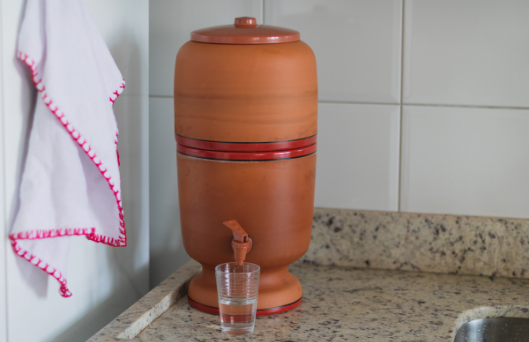

In [3]:
df.where((col("nome") == "Samuel")).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+-------+-----+-------------------+-----+----------------+-------------------+---------------+-----+-------+--------------------+--------------------+--------------------+---------------+
|  Nome|Salario|Idade|          Profissao|Ativo|Data_Contratacao| Ultima_Atualizacao|  Identificador|Notas|   Foto|         Habilidades|           Atributos|            Endereco|Salario_Decimal|
+------+-------+-----+-------------------+-----+----------------+-------------------+---------------+-----+-------+--------------------+--------------------+--------------------+---------------+
|Samuel|  10.25|   30|Engenheiro de Dados|false|      2019-03-22|2023-10-01 12:00:00|123456789012346|  3.8|[00 02]|[Java, PySpark, R...|{Chave1 -> Valor3...|{Rua B, Cidade Y,...|          10.25|
|Samuel| 5000.0|   65|             Agiota| true|      2012-06-10|2023-10-01 12:00:00|123456789012353|  4.1|[00 09]|[So quebra, nao m...|{Chave1 -> Valor1...|{Rua I, Cidade R,...|        5000.00|
+------+-------+-----+---

### Multiplos Filtros
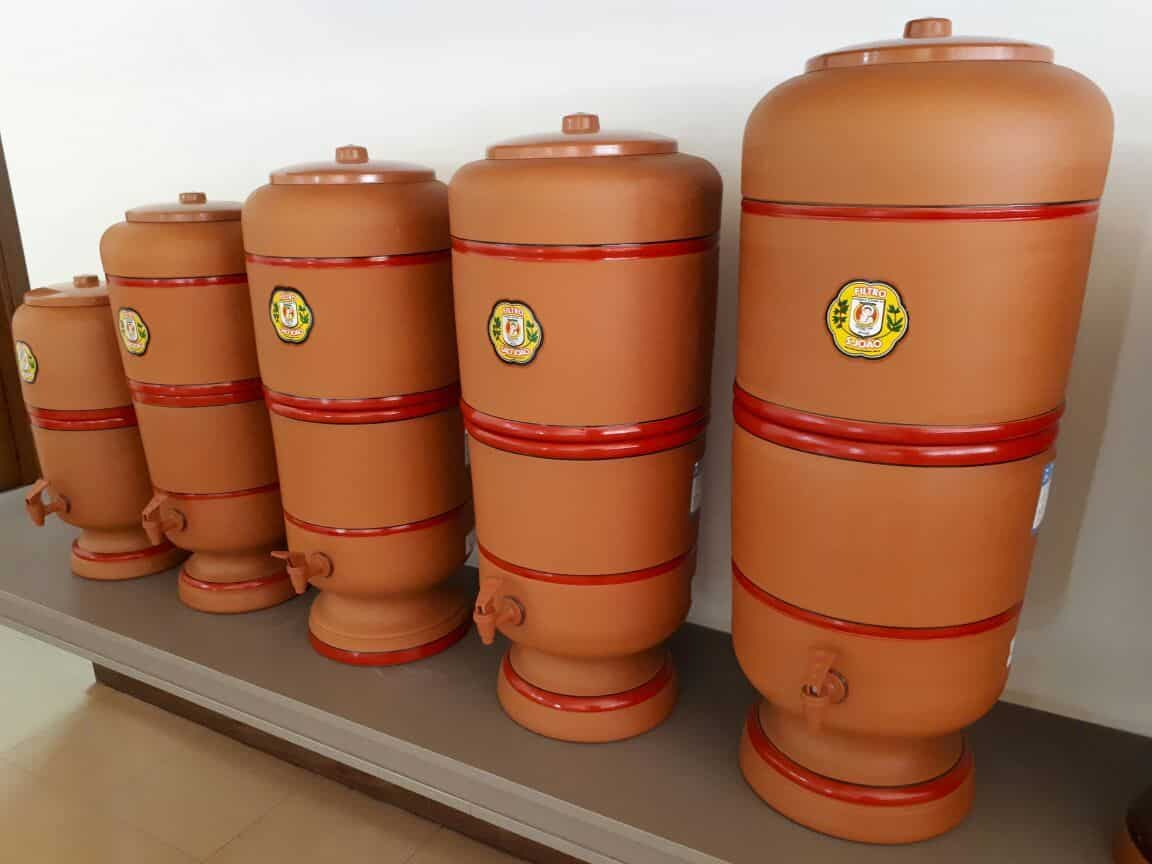

In [4]:
df_pobre = df.where((col("nome") == "Samuel") &
         (col("Profissao") == "Engenheiro de Dados"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
df_pobre.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+-------+-----+-------------------+-----+----------------+-------------------+---------------+-----+-------+--------------------+--------------------+--------------------+---------------+
|  Nome|Salario|Idade|          Profissao|Ativo|Data_Contratacao| Ultima_Atualizacao|  Identificador|Notas|   Foto|         Habilidades|           Atributos|            Endereco|Salario_Decimal|
+------+-------+-----+-------------------+-----+----------------+-------------------+---------------+-----+-------+--------------------+--------------------+--------------------+---------------+
|Samuel|  10.25|   30|Engenheiro de Dados|false|      2019-03-22|2023-10-01 12:00:00|123456789012346|  3.8|[00 02]|[Java, PySpark, R...|{Chave1 -> Valor3...|{Rua B, Cidade Y,...|          10.25|
+------+-------+-----+-------------------+-----+----------------+-------------------+---------------+-----+-------+--------------------+--------------------+--------------------+---------------+

### RH precisa selecionar Futuros Talentos para a Serasa, o que eles fazem?

In [6]:
df.where(array_contains(col("Habilidades"),"Java")).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------+-----+--------------------+-----+----------------+-------------------+---------------+-----+-------+--------------------+--------------------+--------------------+---------------+
|   Nome|Salario|Idade|           Profissao|Ativo|Data_Contratacao| Ultima_Atualizacao|  Identificador|Notas|   Foto|         Habilidades|           Atributos|            Endereco|Salario_Decimal|
+-------+-------+-----+--------------------+-----+----------------+-------------------+---------------+-----+-------+--------------------+--------------------+--------------------+---------------+
| Samuel|  10.25|   30| Engenheiro de Dados|false|      2019-03-22|2023-10-01 12:00:00|123456789012346|  3.8|[00 02]|[Java, PySpark, R...|{Chave1 -> Valor3...|{Rua B, Cidade Y,...|          10.25|
|  Paula| 7500.0|   35|      Desenvolvedora|false|      2017-07-10|2023-10-01 12:00:00|123456789012348|  4.2|[00 04]|      [Java, Python]|{Chave1 -> Valor7...|{Rua D, Cidade W,...|        7500.00|
| Carlos|15000.

# O Samuel agiota descobriu que o controle financeiro é muito mais fácil usando Spark

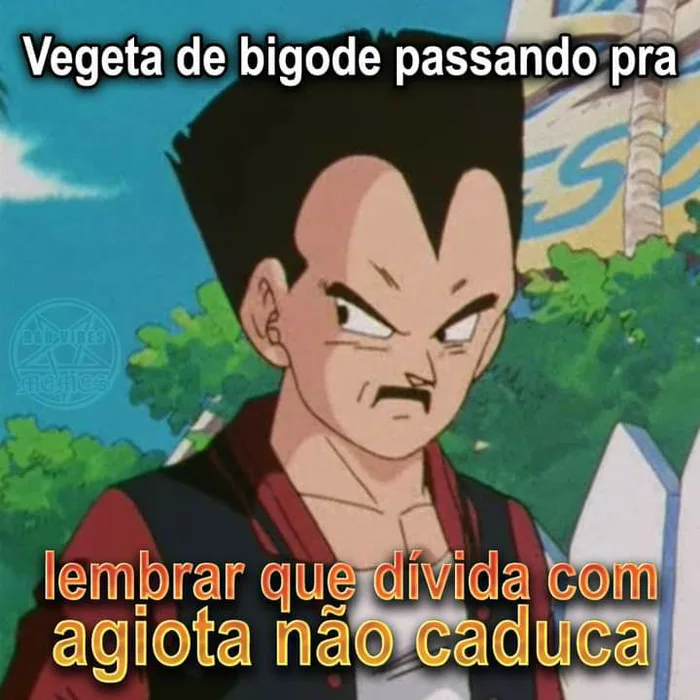

In [7]:
# Definir o esquema
schema = StructType([
    StructField("Nome", StringType(), True),
    StructField("Parcela", IntegerType(), True),
    StructField("Valor", FloatType(), True),
    StructField("Data_Vencimento", DateType(), True)
])

# Lista de nomes fictícios
nomes = ["Samuel", "Alice", "John", "Maria", "Ana", "Pedro", "Julia", "Roberto", "Mariana"]

# Gerar dados fictícios
data = []
valor_base = 100.0
for nome in nomes:
    for mes in range(1, 13):  # 12 meses
        data.append((nome, mes, valor_base, datetime.date(2023, mes, 15)))
        valor_base += 10.0  # Incrementar o valor base para diversidade

# Criar DataFrame
df = spark.createDataFrame(data, schema=schema)

# Exibir DataFrame
df.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+-------+-----+---------------+
|Nome  |Parcela|Valor|Data_Vencimento|
+------+-------+-----+---------------+
|Samuel|1      |100.0|2023-01-15     |
|Samuel|2      |110.0|2023-02-15     |
|Samuel|3      |120.0|2023-03-15     |
|Samuel|4      |130.0|2023-04-15     |
|Samuel|5      |140.0|2023-05-15     |
|Samuel|6      |150.0|2023-06-15     |
|Samuel|7      |160.0|2023-07-15     |
|Samuel|8      |170.0|2023-08-15     |
|Samuel|9      |180.0|2023-09-15     |
|Samuel|10     |190.0|2023-10-15     |
|Samuel|11     |200.0|2023-11-15     |
|Samuel|12     |210.0|2023-12-15     |
|Alice |1      |220.0|2023-01-15     |
|Alice |2      |230.0|2023-02-15     |
|Alice |3      |240.0|2023-03-15     |
|Alice |4      |250.0|2023-04-15     |
|Alice |5      |260.0|2023-05-15     |
|Alice |6      |270.0|2023-06-15     |
|Alice |7      |280.0|2023-07-15     |
|Alice |8      |290.0|2023-08-15     |
+------+-------+-----+---------------+
only showing top 20 rows

### Quantas parcelas têm no registro do Samuel?

In [8]:
df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

108

### Quantas pessoas diferentes devem para o Samuel?

In [9]:
df.select("Nome").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

9

### Como vocês ajudam o Samuel agiota a ver a quantidade de parcelas por devedores?

In [10]:
df.groupBy("Nome").count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----+
|   Nome|count|
+-------+-----+
| Samuel|   12|
|  Maria|   12|
|  Pedro|   12|
|Roberto|   12|
|  Alice|   12|
|   John|   12|
|    Ana|   12|
|  Julia|   12|
|Mariana|   12|
+-------+-----+

### E se ele quiser ver a maior parcela por pessoa?

In [11]:
df_max_valor = df.groupBy("Nome").max("Valor")
df_max_valor.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+----------+
|   Nome|max(Valor)|
+-------+----------+
|  Alice|     330.0|
|  Maria|     570.0|
|  Pedro|     810.0|
|Mariana|    1170.0|
| Samuel|     210.0|
|   John|     450.0|
|    Ana|     690.0|
|  Julia|     930.0|
|Roberto|    1050.0|
+-------+----------+

### Qual a parcela menos lucrativa para o Samuel?


In [12]:
df_max_valor = df.groupBy("Nome").min("Valor")
df_max_valor.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+----------+
|   Nome|min(Valor)|
+-------+----------+
|  Alice|     220.0|
| Samuel|     100.0|
|  Maria|     460.0|
|   John|     340.0|
|  Pedro|     700.0|
|Mariana|    1060.0|
|    Ana|     580.0|
|  Julia|     820.0|
|Roberto|     940.0|
+-------+----------+

### E a média das parcelas?

In [13]:
df_max_valor = df.groupBy("Nome").mean("Valor")
df_max_valor.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+----------+
|   Nome|avg(Valor)|
+-------+----------+
| Samuel|     155.0|
|   John|     395.0|
|    Ana|     635.0|
|  Julia|     875.0|
|  Alice|     275.0|
|Mariana|    1115.0|
|  Pedro|     755.0|
|Roberto|     995.0|
|  Maria|     515.0|
+-------+----------+

### Total das parcelas e qual data da última parcela?

In [14]:
df_max_valor = df.groupBy("Nome").agg(
    sum("Valor").alias("Total_Parcelas"),
    max("Data_Vencimento").alias("Data_Maxima_Vencimento")
)
df_max_valor.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------+----------------------+
|   Nome|Total_Parcelas|Data_Maxima_Vencimento|
+-------+--------------+----------------------+
| Samuel|        1860.0|            2023-12-15|
|   John|        4740.0|            2023-12-15|
|    Ana|        7620.0|            2023-12-15|
|  Julia|       10500.0|            2023-12-15|
|  Maria|        6180.0|            2023-12-15|
|  Pedro|        9060.0|            2023-12-15|
|Roberto|       11940.0|            2023-12-15|
|Mariana|       13380.0|            2023-12-15|
|  Alice|        3300.0|            2023-12-15|
+-------+--------------+----------------------+

### O samuel têm as informações do cadastro das pessoas, como ele cruza essas duas informações?

# JOIN`S
## A explicação suprema para vocês nunca mais confundirem

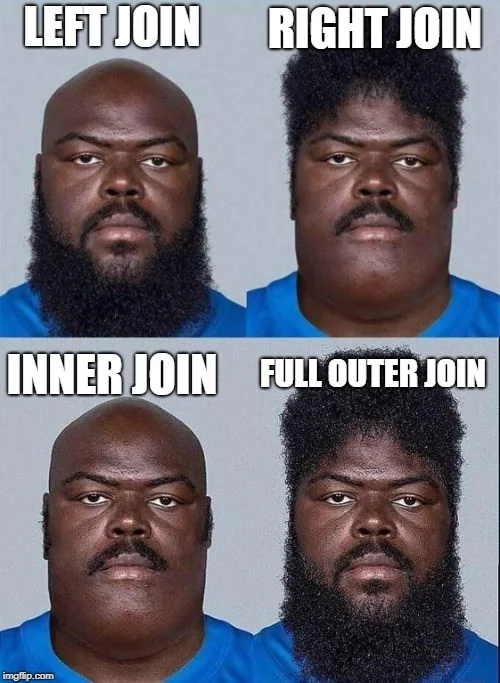

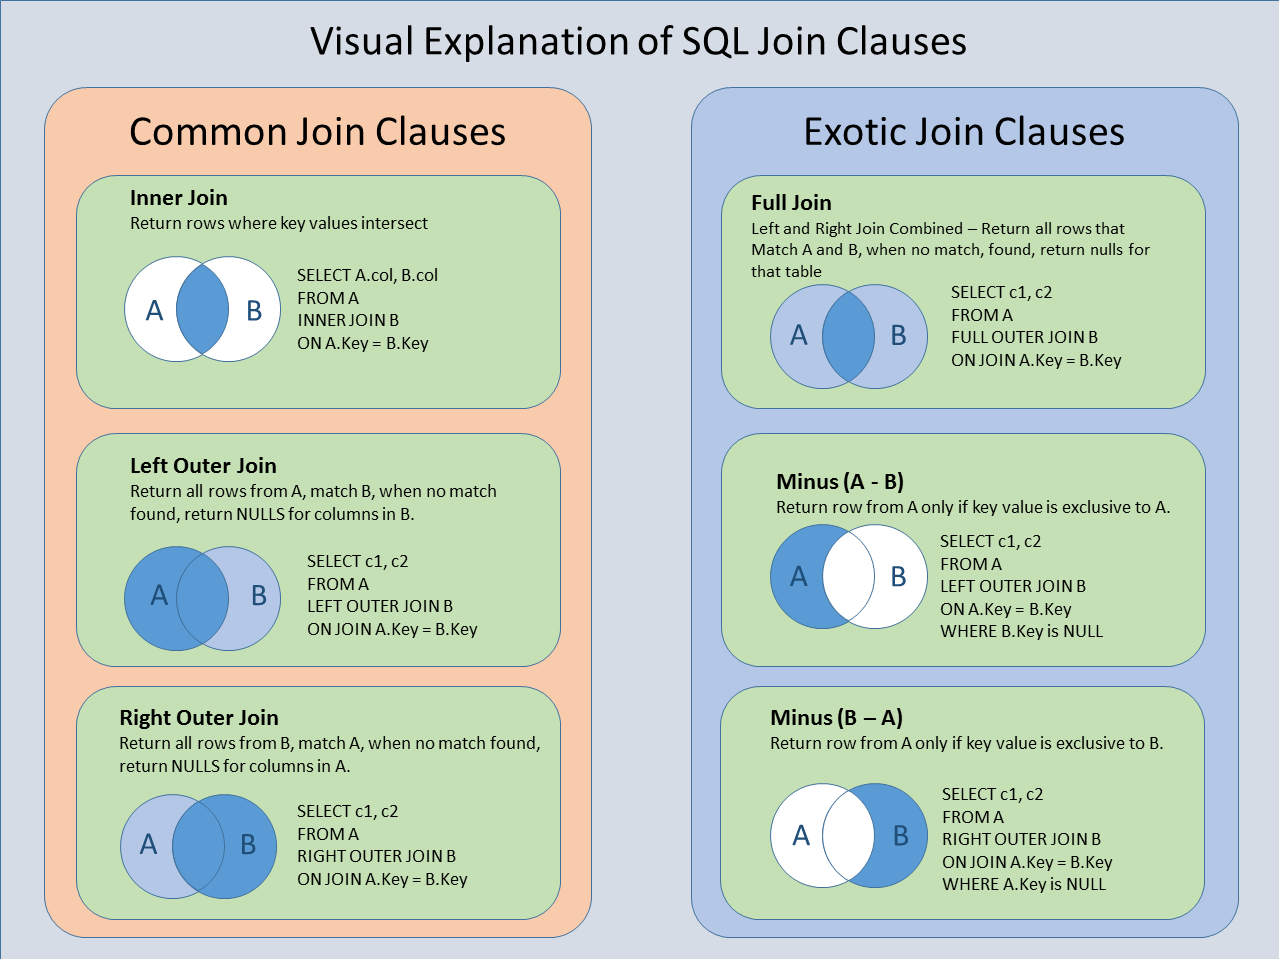

In [15]:
# Definir o esquema para o DataFrame de pessoas
schema_pessoas = StructType([
    StructField("Nome", StringType(), True),
    StructField("Idade", IntegerType(), True),
    StructField("Cidade", StringType(), True)
])

# Dados fictícios para pessoas
dados_pessoas = [
    ("Samuel", 30, "São Paulo"),
    ("Alice", 25, "Rio de Janeiro"),
    ("John", 28, "Curitiba"),
    ("Maria", 32, "Belo Horizonte"),
    ("Carlos", 27, "Porto Alegre"),
    ("Ana", 29, "Salvador"),
    ("Pedro", 31, "Fortaleza"),
    ("Julia", 26, "Brasília"),
    ("Roberto", 33, "Manaus"),
    ("Mariana", 24, "Recife"),
    ("Lineu", 120, "Velhopolis"),
    ("Teresa", 90, "Ibaté"),
    ("Cleuza", 10, "São Carlos"),
]

# Criar DataFrames
df_pessoas = spark.createDataFrame(dados_pessoas, schema=schema_pessoas)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
# Fazer join dos DataFrames de pessoas e parcelas agregadas
df_inner = df_pessoas.join(df_max_valor, on="Nome", how="inner")

df_inner.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----+--------------+--------------+----------------------+
|   Nome|Idade|        Cidade|Total_Parcelas|Data_Maxima_Vencimento|
+-------+-----+--------------+--------------+----------------------+
|  Alice|   25|Rio de Janeiro|        3300.0|            2023-12-15|
|    Ana|   29|      Salvador|        7620.0|            2023-12-15|
|   John|   28|      Curitiba|        4740.0|            2023-12-15|
|  Julia|   26|      Bras?lia|       10500.0|            2023-12-15|
|  Maria|   32|Belo Horizonte|        6180.0|            2023-12-15|
|Mariana|   24|        Recife|       13380.0|            2023-12-15|
|  Pedro|   31|     Fortaleza|        9060.0|            2023-12-15|
|Roberto|   33|        Manaus|       11940.0|            2023-12-15|
| Samuel|   30|     S?o Paulo|        1860.0|            2023-12-15|
+-------+-----+--------------+--------------+----------------------+

In [17]:
# Fazer join dos DataFrames de pessoas e parcelas agregadas
df_left = df_pessoas.join(df_max_valor, on="Nome", how="left")

df_left.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----+--------------+--------------+----------------------+
|   Nome|Idade|        Cidade|Total_Parcelas|Data_Maxima_Vencimento|
+-------+-----+--------------+--------------+----------------------+
|  Lineu|  120|    Velhopolis|          null|                  null|
|Roberto|   33|        Manaus|       11940.0|            2023-12-15|
| Cleuza|   10|    S?o Carlos|          null|                  null|
|Mariana|   24|        Recife|       13380.0|            2023-12-15|
| Teresa|   90|         Ibat?|          null|                  null|
|  Alice|   25|Rio de Janeiro|        3300.0|            2023-12-15|
| Samuel|   30|     S?o Paulo|        1860.0|            2023-12-15|
| Carlos|   27|  Porto Alegre|          null|                  null|
|   John|   28|      Curitiba|        4740.0|            2023-12-15|
|    Ana|   29|      Salvador|        7620.0|            2023-12-15|
|  Julia|   26|      Bras?lia|       10500.0|            2023-12-15|
|  Pedro|   31|     Fortaleza|    

In [18]:
# Fazer join dos DataFrames de pessoas e parcelas agregadas
df_right = df_pessoas.join(df_max_valor, on="Nome", how="left")

df_right.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----+--------------+--------------+----------------------+
|   Nome|Idade|        Cidade|Total_Parcelas|Data_Maxima_Vencimento|
+-------+-----+--------------+--------------+----------------------+
|    Ana|   29|      Salvador|        7620.0|            2023-12-15|
|  Pedro|   31|     Fortaleza|        9060.0|            2023-12-15|
|  Maria|   32|Belo Horizonte|        6180.0|            2023-12-15|
|Roberto|   33|        Manaus|       11940.0|            2023-12-15|
|  Julia|   26|      Bras?lia|       10500.0|            2023-12-15|
|Mariana|   24|        Recife|       13380.0|            2023-12-15|
|  Alice|   25|Rio de Janeiro|        3300.0|            2023-12-15|
| Cleuza|   10|    S?o Carlos|          null|                  null|
|  Lineu|  120|    Velhopolis|          null|                  null|
| Teresa|   90|         Ibat?|          null|                  null|
| Carlos|   27|  Porto Alegre|          null|                  null|
|   John|   28|      Curitiba|    

In [19]:
# Fazer join dos DataFrames de pessoas e parcelas agregadas
df_full = df_pessoas.join(df_max_valor, on="Nome", how="full")
df_full.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----+--------------+--------------+----------------------+
|   Nome|Idade|        Cidade|Total_Parcelas|Data_Maxima_Vencimento|
+-------+-----+--------------+--------------+----------------------+
|  Alice|   25|Rio de Janeiro|        3300.0|            2023-12-15|
|    Ana|   29|      Salvador|        7620.0|            2023-12-15|
| Carlos|   27|  Porto Alegre|          null|                  null|
| Cleuza|   10|    S?o Carlos|          null|                  null|
|   John|   28|      Curitiba|        4740.0|            2023-12-15|
|  Julia|   26|      Bras?lia|       10500.0|            2023-12-15|
|  Lineu|  120|    Velhopolis|          null|                  null|
|  Maria|   32|Belo Horizonte|        6180.0|            2023-12-15|
|Mariana|   24|        Recife|       13380.0|            2023-12-15|
|  Pedro|   31|     Fortaleza|        9060.0|            2023-12-15|
|Roberto|   33|        Manaus|       11940.0|            2023-12-15|
| Samuel|   30|     S?o Paulo|    

### Como eu ordeno esses caras?


In [20]:
df_full.orderBy("Idade", ascending=False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----+--------------+--------------+----------------------+
|   Nome|Idade|        Cidade|Total_Parcelas|Data_Maxima_Vencimento|
+-------+-----+--------------+--------------+----------------------+
|  Lineu|  120|    Velhopolis|          null|                  null|
| Teresa|   90|         Ibat?|          null|                  null|
|Roberto|   33|        Manaus|       11940.0|            2023-12-15|
|  Maria|   32|Belo Horizonte|        6180.0|            2023-12-15|
|  Pedro|   31|     Fortaleza|        9060.0|            2023-12-15|
| Samuel|   30|     S?o Paulo|        1860.0|            2023-12-15|
|    Ana|   29|      Salvador|        7620.0|            2023-12-15|
|   John|   28|      Curitiba|        4740.0|            2023-12-15|
| Carlos|   27|  Porto Alegre|          null|                  null|
|  Julia|   26|      Bras?lia|       10500.0|            2023-12-15|
|  Alice|   25|Rio de Janeiro|        3300.0|            2023-12-15|
|Mariana|   24|        Recife|    

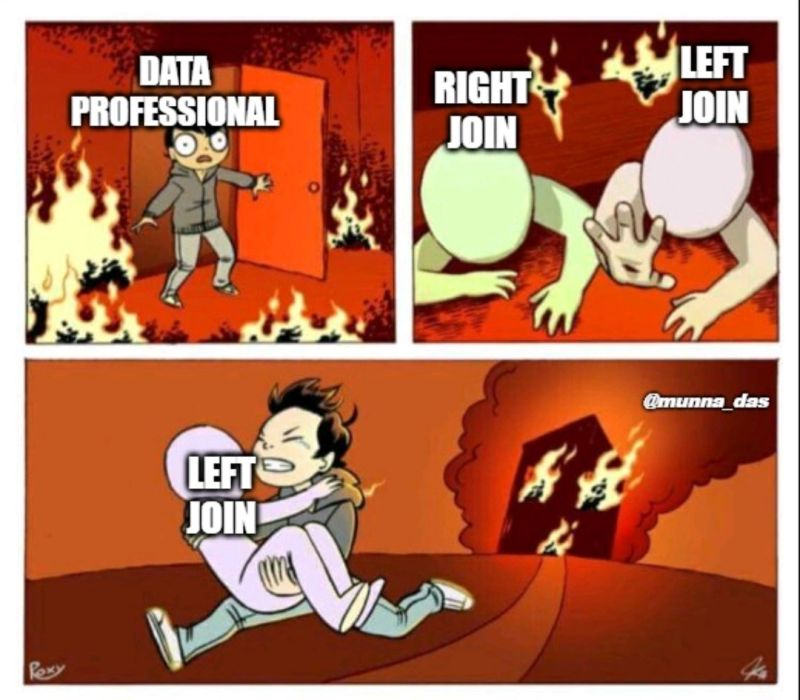

### E se o Samuel quiser aplicar o "juros de final de contrato escrito em letras miúdas"?

In [21]:
# Definir uma função que será aplicada à coluna "Valor"
def aumentar_valor(valor):
    return valor * 1.1

# Registrar a função como UDF
aumentar_valor_udf = udf(aumentar_valor, FloatType())

# Aplicar a função à coluna "Valor" usando withColumn
df_modificado = df_inner.withColumn("Valor_Aumentado", aumentar_valor_udf(df_inner["Total_Parcelas"]))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# UDF`s são extremamente lentas e morosas, podem acabar com seu processamento

In [22]:
df_modificado.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
An error occurred while calling o227.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 74.0 failed 4 times, most recent failure: Lost task 0.3 in stage 74.0 (TID 1413) (ip-10-120-167-98.sa-east-1.compute.internal executor 15): java.lang.RuntimeException: Failed to run command: /usr/bin/virtualenv -p python3 --no-pip --system-site-packages virtualenv_application_1730479023085_0009_0
	at org.apache.spark.api.python.VirtualEnvFactory.execCommand(VirtualEnvFactory.scala:124)
	at org.apache.spark.api.python.VirtualEnvFactory.setupVirtualEnv(VirtualEnvFactory.scala:82)
	at org.apache.spark.api.python.PythonWorkerFactory.<init>(PythonWorkerFactory.scala:95)
	at org.apache.spark.SparkEnv.$anonfun$createPythonWorker$1(SparkEnv.scala:128)
	at scala.collection.mutable.HashMap.getOrElseUpdate(HashMap.scala:86)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:128)
	at org.apache.spark.api.python.BasePythonRunner